___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Проверочный проект по моделям машинного обучения с учителем (supervised learning) - Методы на основе деревьев



## Этот проверочный проект можно выполнять тремя разными способами - мы обсуждаем это в видео-лекции с обзором проверочных заданий!

----

**Проверочный проект можно выполнять одним из трёх способов:**
   1. Открыть новый блокнот Jupyter Notebook, загрузить данные из файла - и далее самостоятельно выполнить анализ и визуализацию данных, а также создать предиктивную модель.
   2. Использовать блокнот с заданиями как общее руководство к действию, выполняя задания, написанные жирным шрифтом.
   3. Сразу перейти к блокноту с решениями и видео-лекциям с решениями, и параллельно с просмотром лекций выполнять эти задания в своём блокноте.

------
------

## ЦЕЛЬ: Создать модель предсказания того, уйдёт ли абонент в отток (churn).

----
----


## Выполните задания ниже, обозначенные жирным шрифтом!

## Часть 0: Импортируем библиотеки и загружаем данные

**Задание: Запустите уже готовые ячейки ниже, чтобы импортировать библиотеки и загрузить данные из файла в датафрейм. Файл называется "Telco-Customer-Churn.csv"**

In [468]:
# Запустите эти ячейки для начала выполнения проекта!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [469]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [470]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Часть 1: Общие характеристики данных

**Задание: С помощью метода .info() проверьте типы данных для колонок, а также есть ли отсутствующие значения в Вашем датафрейме.**

In [471]:
# Напишите Ваш код в этой ячейке
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**Задание: Выведите статистические метрики для числовых колонок с помощью .describe(). Вы увидите, что большинство колонок являются категориальными, поэтому Вам позднее нужно будет создать для них дамми-переменные.**

In [472]:
# Напишите Ваш код в этой ячейке
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Часть 2:  Исследование данных (Exploratory Data Analysis)

## Исследование признаков

**Задание: Проверьте, что в этих данных нет отсутствующих значений - для этого выведите количество значений NaN отдельно для каждой колонки.**

In [473]:
# Напишите Ваш код в этой ячейке
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Задание: Постройте график CountPlot для проверки сбалансированности значений колонки с классами (Churn).**

<Axes: xlabel='Churn', ylabel='count'>

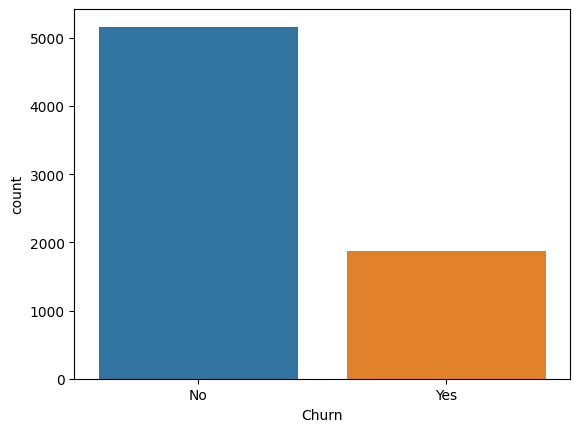

In [474]:
# Напишите Ваш код в этой ячейке
sns.countplot(data=df, x='Churn', hue='Churn')

In [475]:
#We can see that the classes are imbalanced!

<img src='fig1.png' >

**Задание: Исследуйте распределение колонки TotalCharges по различным категориям Churn с помощью графика Box Plot или Violin Plot.**

<Axes: xlabel='Churn', ylabel='TotalCharges'>

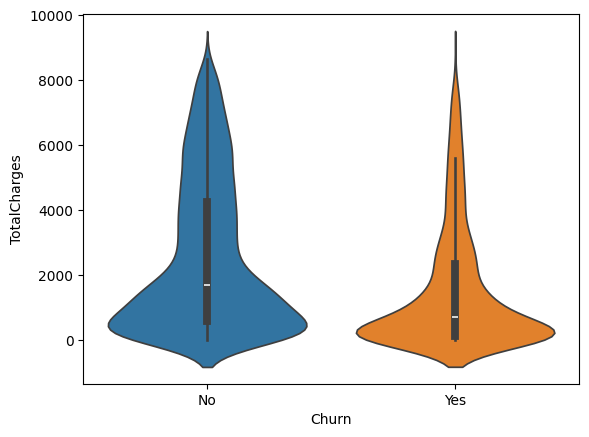

In [476]:
# Напишите Ваш код в этой ячейке
sns.violinplot(data=df, y='TotalCharges', x='Churn', hue='Churn')

<Axes: xlabel='Churn', ylabel='TotalCharges'>

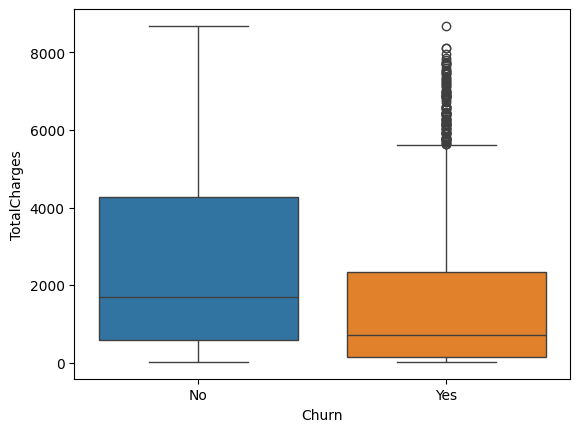

In [477]:
sns.boxplot(data=df, y='TotalCharges', x='Churn', hue='Churn')

<img src='fig2.png' >

**Задание: Постройте график boxplot с распределением колонки TotalCharges для различных типов контрактов, а также добавьте раскраску цветами по колонке Churn.**

<Axes: xlabel='Contract', ylabel='TotalCharges'>

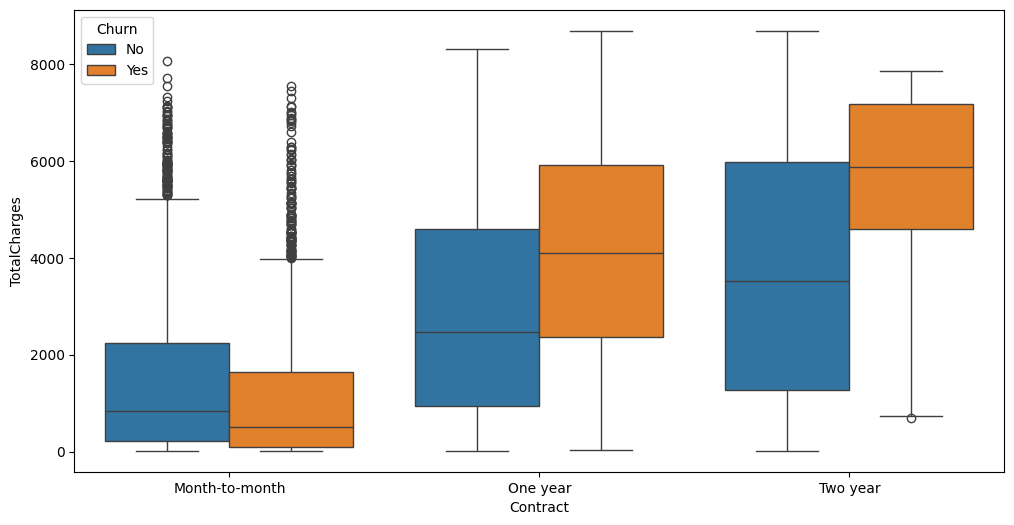

In [478]:
# Напишите Ваш код в этой ячейке
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')

<img src='fig3.png' >

**Задание: Постройте график barplot с корреляции указанных ниже признаков с целевой переменной. Обратите внимание, что для категориальных признаков сначала нужно сконвертировать их в дамми-переменные, потому что корреляция вычисляется только для числовых колонок.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Мы специально привели список признаков, чтобы не проверять все признаки. Дело в том, что некоторые признаки имеют слишком много уникальных значений для такого анализа, например колонка customerID.***

In [479]:
feats = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService', 
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']],
    drop_first=False, dtype=int)
feats.head()


,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0,1,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
2,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0,1,1,0,1,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,1,0,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0


In [480]:
feat_class = pd.concat([feats, df['Churn'].map({'Yes': 1, 'No': 0})], axis=1)
feat_class

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,0,0,1,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,1,0,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
2,0,0,1,1,0,1,0,0,1,1,...,1,0,0,0,1,0,0,0,1,1
3,0,0,1,1,0,1,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
4,0,1,0,1,0,1,0,0,1,1,...,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
7028,0,1,0,0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
7029,0,1,0,0,1,0,1,1,0,0,...,1,0,0,0,1,0,0,1,0,0
7030,1,0,1,0,1,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,1


In [481]:
feat_class_corr = feat_class.corr()['Churn']

In [482]:
df_corr = pd.DataFrame(feat_class_corr[:-1].sort_values())

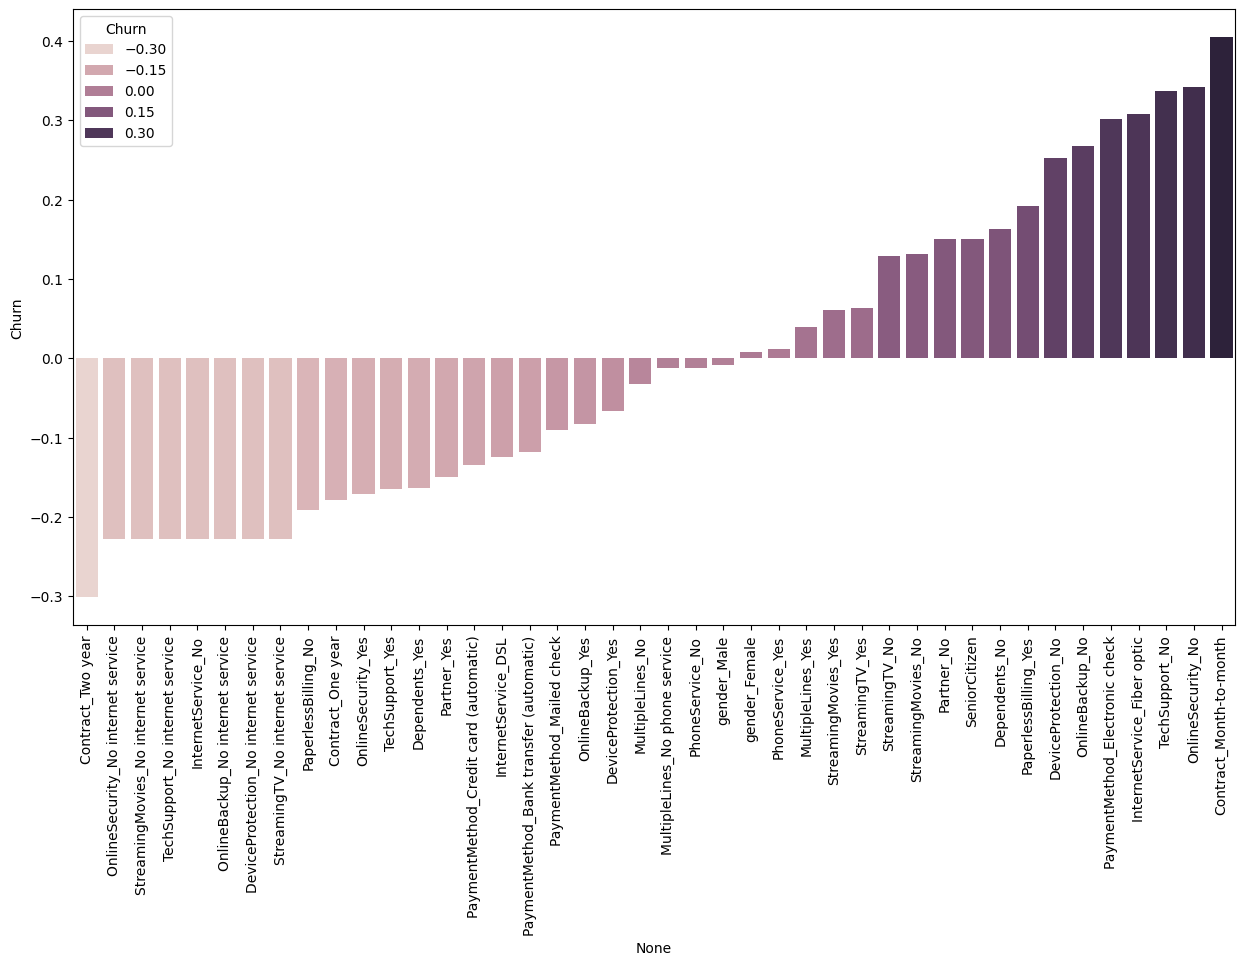

In [483]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df_corr, x=df_corr.index, y='Churn', hue='Churn')
plt.xticks(rotation=90);

<img src='figbar.png'>

---
---

# Часть 3: Анализ оттока

**В этих заданиях мы выполним сегментацию абонентов на основе колонки tenure, создавая "когорты" и выполняя сравнение данных между различными когортами.**

**Задание: Перечислите 3 типа контракта (колонка Contract).**

In [484]:
# Напишите Ваш код в этой ячейке
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

**Задание: Создайте гистограмму с распределением значений колонки tenure - это количество месяцев, сколько времени человек является (или являлся) абонентом компании.**

<Axes: xlabel='tenure', ylabel='Count'>

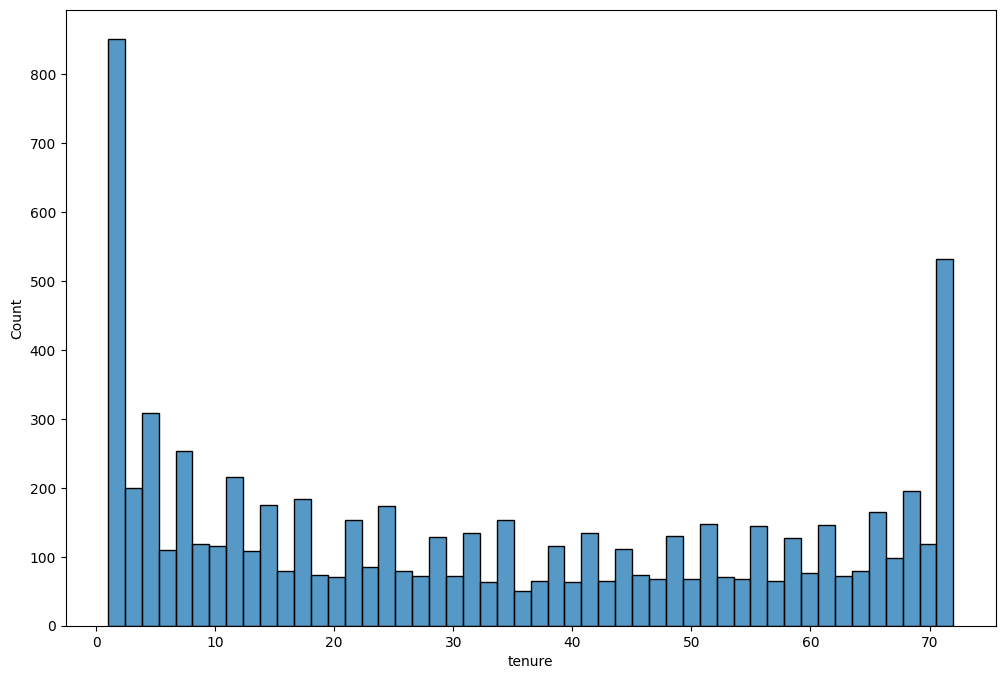

In [485]:
# Напишите Ваш код в этой ячейке
plt.figure(figsize=(12, 8))
sns.histplot(df['tenure'], bins=50)

<img src="fig5.png">

**Задание: Постройте гистограммы для колонки tenure, разбивая данные по двум колонкам - Churn и Contract. Посмотрите документацию по seaborn или блокноты для раздела про seaborn, чтобы вспомнить, как это делается.**

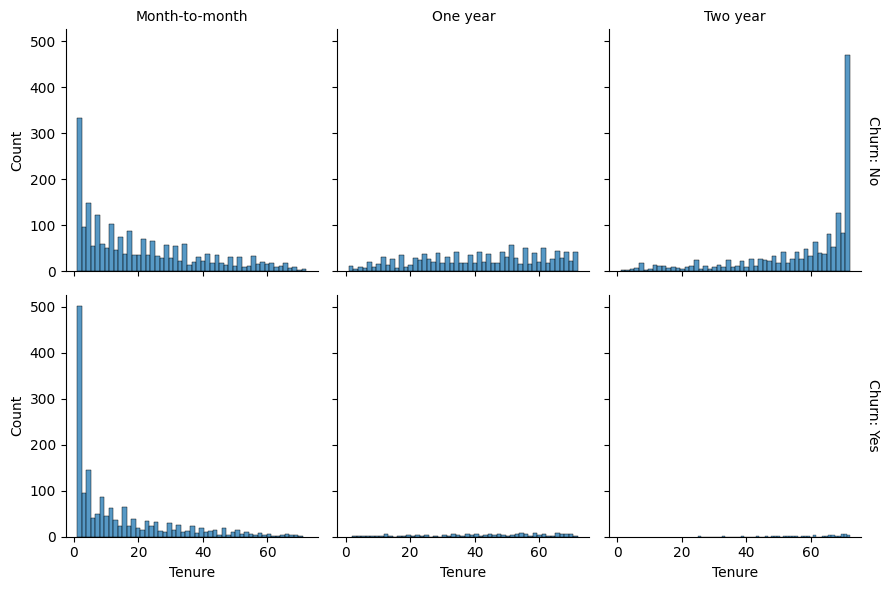

In [486]:

# Create a facet grid: contracts in columns, churn status in rows
g = sns.FacetGrid(df, col="Contract", row="Churn", margin_titles=True)

# Map histplot onto the grid
g.map_dataframe(sns.histplot, x="tenure", bins=50)

# Adjust layout
g.set_axis_labels("Tenure", "Count")
g.set_titles(col_template="{col_name}", row_template="Churn: {row_name}")
plt.show()


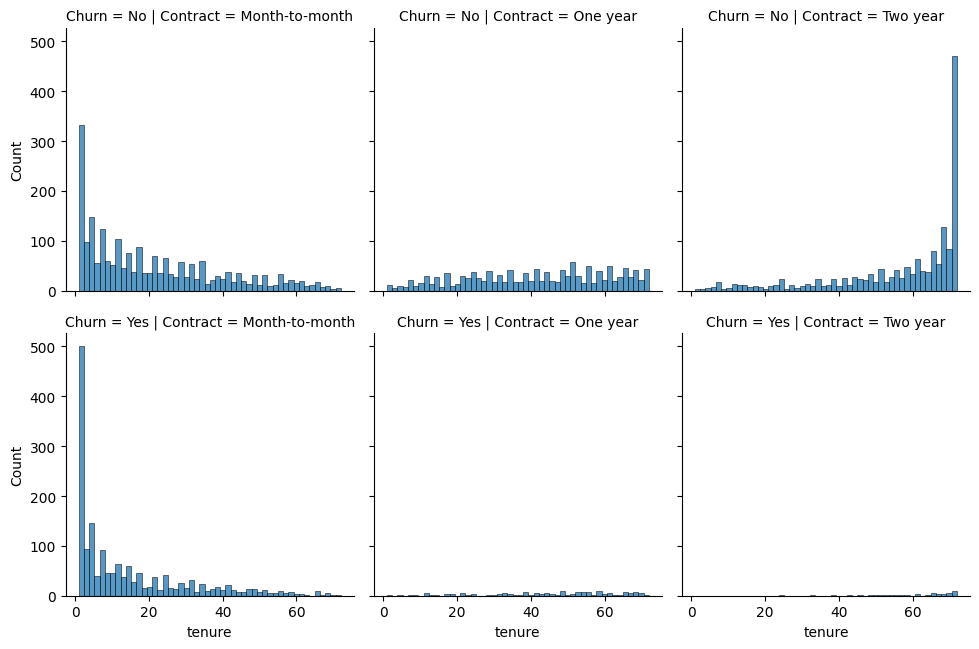

In [487]:
sns.displot(data=df, x='tenure', col='Contract', row='Churn', bins=50, height=3.3)


<img src="fig6.png">

**Задание: Постройте график scatterplot для колонок Total Charges и Monthly Charges, раскрашивая график цветами по колонке Churn.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

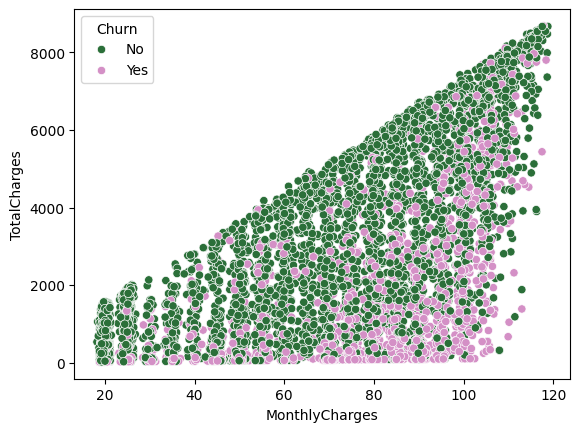

In [ ]:
# Напишите Ваш код в этой ячейке
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette='cubehelix')

<img src='fig7.png'>

### Создание когорт (сегментов) по колонке Tenure

**Для начала поместим различные значения tenure (1 месяц, 2 месяца, 3 месяца и так далее) в отдельные когорты (сегменты).**

**Задание: Для каждого уникального значения колонки tenure в качестве когорты, вычислите процент оттока (churn rate) - это количество тех людей, кто ушёл в отток в когорте, как процент от общего количества людей в данной когорте. Вычислите такой процент отдельно для каждой когорты. Например, для когорты с tenure = "1 месяц" должен получиться процент оттока 61.99%. В итоге у Вас должны получиться когорты от 1 до 72 месяцев, и с увеличением количества месяцев уровень оттока должен снижаться. Это разумно, потому что чем дольше человек пользуется услугами компании, тем вероятнее то, что его/её всё устраивает, и он/она продолжит пользоваться этими услугами.**

In [556]:
df[df['tenure'] ==  1]['Churn'].value_counts(), df[df['tenure'] ==  2]['Churn'].value_counts(), df[df['tenure'] == 3]['Churn'].value_counts()

#As value_counts() method sorts values, we should use ['Yes']/['No'] instead of [0] or any other int value

(Churn
 Yes    380
 No     233
 Name: count, dtype: int64,
 Churn
 Yes    123
 No     115
 Name: count, dtype: int64,
 Churn
 No     106
 Yes     94
 Name: count, dtype: int64)

In [559]:
percent = (df.groupby(['Churn', 'tenure']).count().T['Yes'] / (df.groupby(['Churn', 'tenure']).count().T['Yes'] + df.groupby(['Churn', 'tenure']).count().T['No']) * 100).iloc[0]
#percent

In [560]:
percent = {}

for n in range(1, 73):
    churn_yes = df[df['tenure'] == n]['Churn'].value_counts()['Yes']
    churn_val = len(df[df['tenure'] == n])
    
    percent[n] = round(churn_yes / churn_val * 100, 3)

In [ ]:
#percent

In [576]:
df.groupby(by='tenure')['Churn'].apply(lambda x: (x == 'Yes').sum() / x.count() * 100).round(3)

tenure
1     61.990
2     51.681
3     47.000
4     47.159
5     48.120
       ...  
68     9.000
69     8.421
70     9.244
71     3.529
72     1.657
Name: Churn, Length: 72, dtype: float64

**Задание: Используя результаты предыдущего задания, постройте график процента оттока для различных значений tenure.**

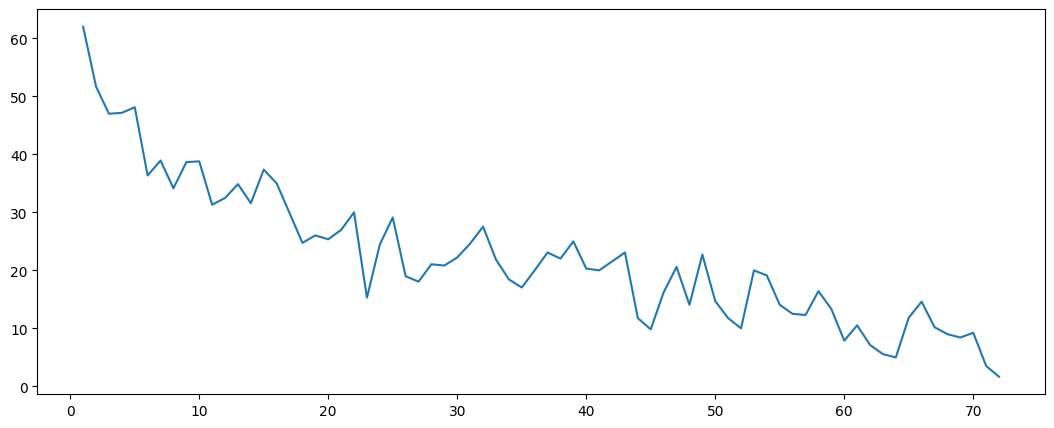

In [554]:
# Напишите Ваш код в этой ячейке
plt.figure(figsize=(13, 5))
plt.plot(percent.keys(), percent.values())

<img src='fig9.png'>

### Более крупные когорты (сегменты)
**Задание: На основе колонки tenure создайте новую колонку с названием "Tenure Cohort", в которой будут следующие 4 категории:**
   * '0-12 месяцев'
   * '12-24 месяцев'
   * '24-48 месяцев'
   * 'Более 48 месяцев'    

In [675]:
test_df = df.copy()
test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [676]:
test_df['tenure'] = test_df['tenure'].transform(lambda x: '0-12' if x in range(1, 13) else x)

In [678]:
test_df['tenure'] = test_df['tenure'].transform(lambda x: '12-24' if x in range(13, 25) else x)

In [680]:
test_df['tenure'] = test_df['tenure'].transform(lambda x: '24-48' if x in range(25, 48) else x)

In [682]:
test_df['tenure'] = test_df['tenure'].transform(lambda x: 'more than 48' if x in range(48, 100) else x)

In [701]:
test_df['tenure'].value_counts()

tenure
more than 48    2303
0-12            2175
24-48           1530
12-24           1024
Name: count, dtype: int64

In [684]:
test_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [691]:
# Напишите Ваш код в этой ячейке
df['Tenure Cohort'] = test_df['tenure']

In [ ]:
#BETTER WAY TO SOLVE THIS TASK
def cohort(tenure):
    if tenure < 13:
        return '0-12 months'
    elif tenure < 25:
        return '12-24 months'
    elif tenure < 49:
        return '24-48 months'
    else:
        return 'more than 48 months' 
    
df['Tenure Cohort'] = df['tenure'].apply(cohort)

**Задание: Постройте график scatterplot для Total Charges и Monthly Charges, раскрашивая график разными цветами по колонке "Tenure Cohort", которую Вы создали в предыдущем задании.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

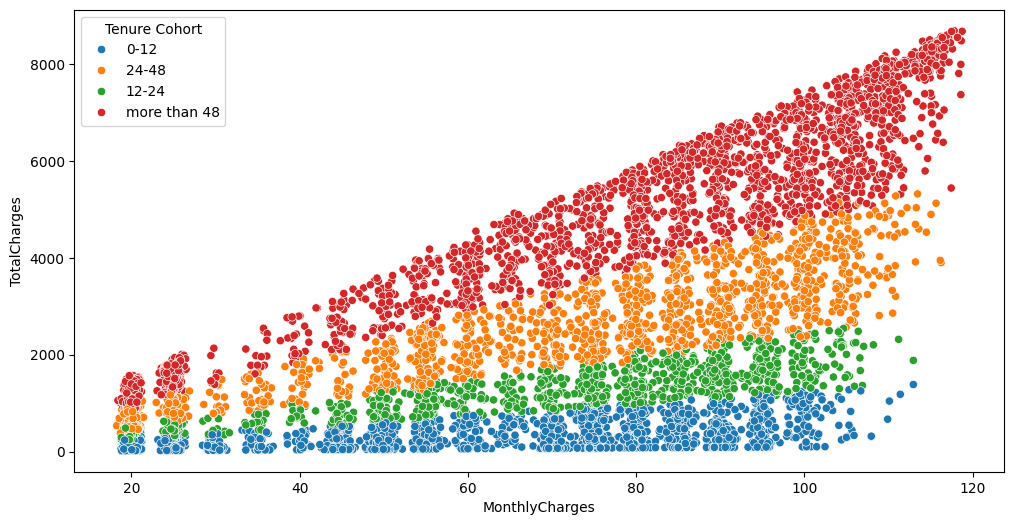

In [699]:
# Напишите Ваш код в этой ячейке
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort')

<img src='fig10.png'>

**Задание: Постройте график countplot с количеством ушедших и не ушедших в отток людей в каждой когорте.**

<Axes: xlabel='Churn', ylabel='count'>

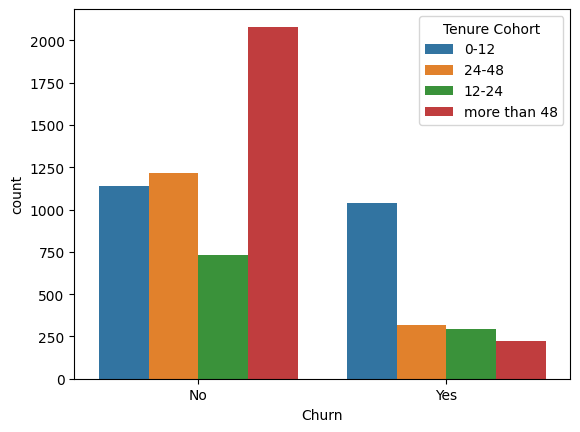

In [705]:
# Напишите Ваш код в этой ячейке
sns.countplot(data=df, x='Churn', hue='Tenure Cohort')

<Axes: xlabel='Tenure Cohort', ylabel='count'>

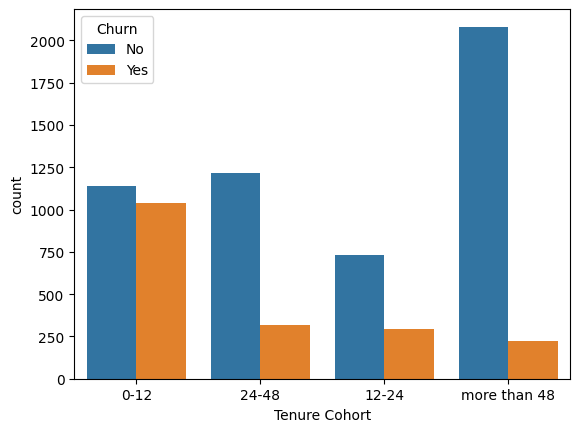

In [707]:
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')

<img src='cplot.png'>

**Задание: Создайте набор графиков CountPlot с количеством людей по различным когортам Tenure Cohort. Для каждого типа контракта создайте отдельный график, и раскрасьте эти графики разными цветами по колонке Churn.**

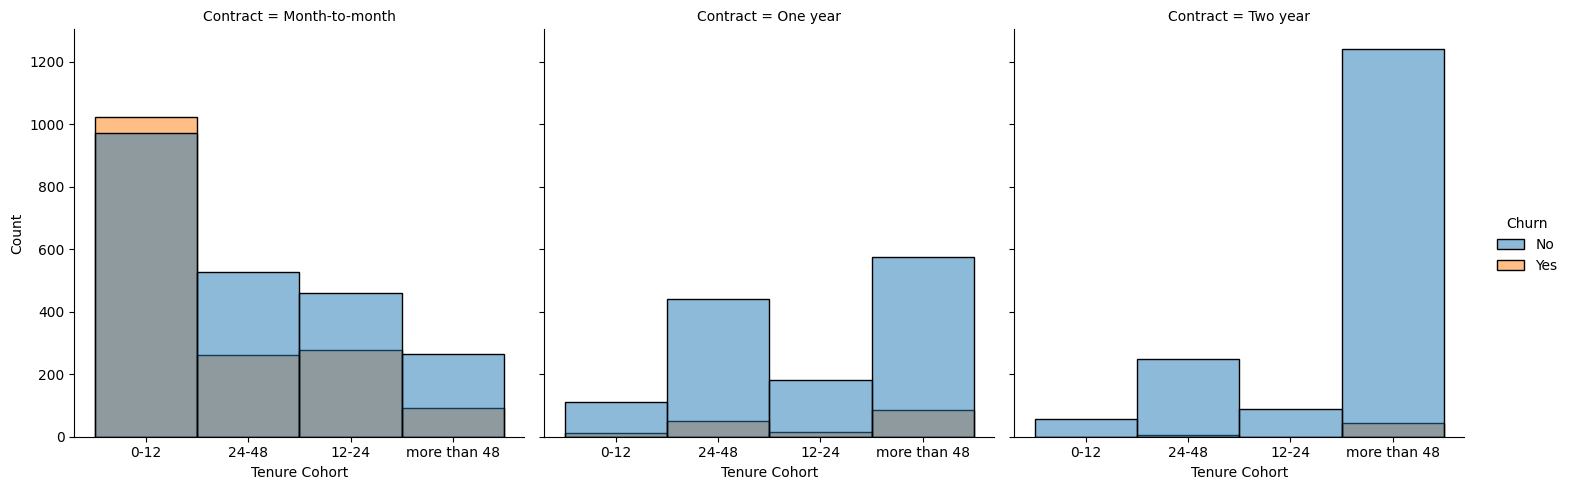

In [713]:
# Напишите Ваш код в этой ячейке
sns.displot(data=df, x='Tenure Cohort', col='Contract', hue='Churn')

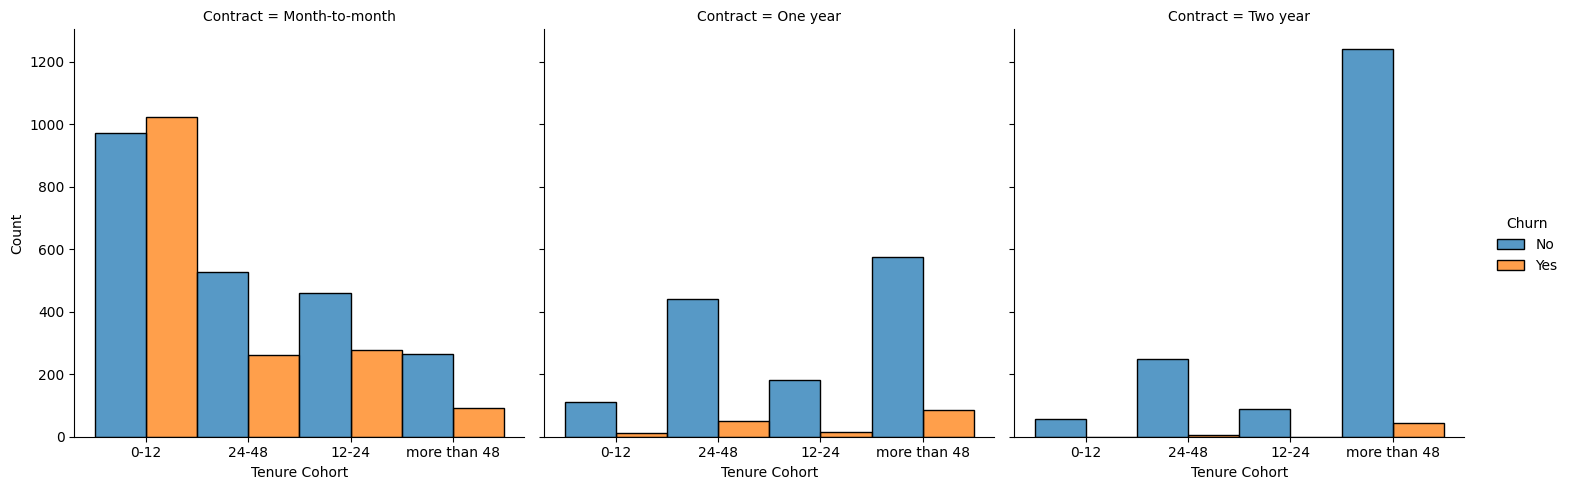

In [723]:
sns.displot(data=df, x='Tenure Cohort', col='Contract', hue='Churn', multiple='dodge')

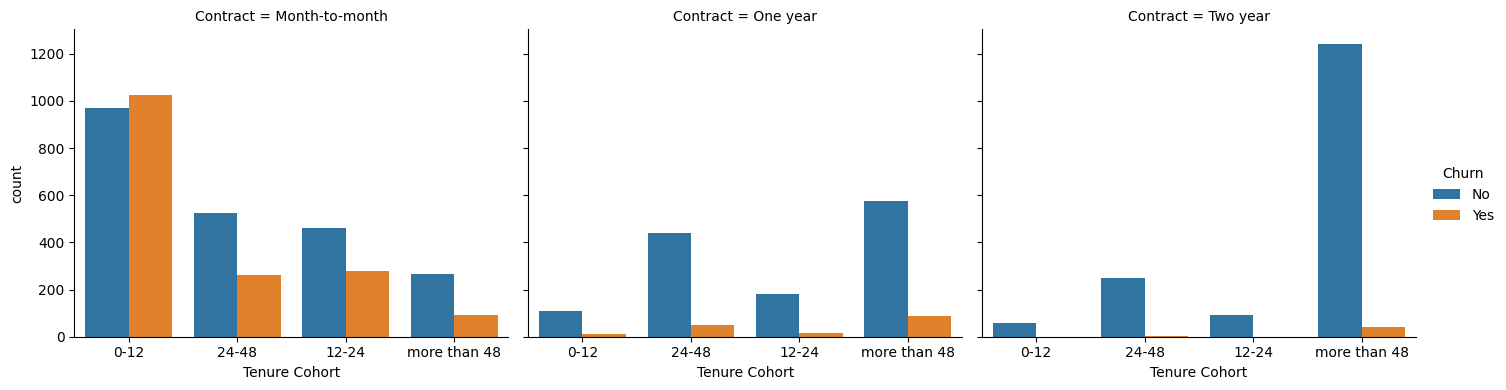

In [724]:
sns.catplot(
    data=df,
    x="Tenure Cohort",
    col="Contract",
    hue="Churn",
    kind="count",
    height=4,
    aspect=1.2
)


<img src='fig11.png'>

-----

# Часть 4: Предиктивная модель

**Давайте исследуем 4 модели на основе деревьев: одно дерево решений, случайный лес, адаптивный бустинг и градиентный бустинг. При желании Вы можете дополнительно попробовать любые другие модели машинного обучения с учителем (supervised learning models) и сравнить результаты!**


## Одно дерево решений (Decision Tree)

**Задание: Разделите все данные на признаки X и целевую переменную Y. Создайте дамми-переменные, где это необходимо, а также посмотрите, есть ли какие-то признаки, которые можно было бы удалить.**

In [729]:
# Напишите Ваш код в этой ячейке
for col in df.columns:
    print(F"{col} : {len(df[col].value_counts())}")

customerID : 7032
gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 72
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1584
TotalCharges : 6530
Churn : 2
Tenure Cohort : 4


In [767]:
pd.concat([X, y.map({'Yes': 1, 'No': 0})], axis=1).corr()['Churn'].sort_values()

tenure                                  -0.354049
Contract_Two year                       -0.301552
Tenure Cohort_more than 48              -0.267590
OnlineSecurity_No internet service      -0.227578
TechSupport_No internet service         -0.227578
StreamingMovies_No internet service     -0.227578
DeviceProtection_No internet service    -0.227578
OnlineBackup_No internet service        -0.227578
StreamingTV_No internet service         -0.227578
InternetService_No                      -0.227578
TotalCharges                            -0.199484
Contract_One year                       -0.178225
OnlineSecurity_Yes                      -0.171270
TechSupport_Yes                         -0.164716
Dependents_Yes                          -0.163128
Partner_Yes                             -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup_Yes                        -0.082307
Tenure Cohort_24-48                     -0.070728


In [747]:
X = df.drop(['Churn', 'customerID'], axis=1)
X = pd.get_dummies(X, drop_first=True, dtype=int)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Cohort_12-24,Tenure Cohort_24-48,Tenure Cohort_more than 48
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [749]:
y = df['Churn']
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

**Задание: Выполните разбиение данных на обучающий и тестовый наборы (train test split), откладывая в сторону 10% данных для тестирования. В решениях мы используем random_state=101.**

In [768]:
# Напишите Ваш код в этой ячейке
from sklearn.model_selection import train_test_split

In [769]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Задание: Постройте модель Decision Tree и оцените её работу. Для этого выполните следующие шаги:**
   1. Обучите модель дерева решений (при желании можете выполнить поиск по сетке для поиска оптимальных значений гиперпараметров).
   2. Оцените метрики работы модели дерева решений - для этого выведите отчёт "classification report" и нарисуйте график с матрицей ошибок (confusion matrix).
   2. Посмотрите на важности признаков для получившегося дерева решений.
   4. Опционально: Нарисуйте график получившегося дерева. Обратите внимание, что если дерево получилось очень большим и Вы не выполняли усечение дерева с помощью параметров, то вызов метода plot_tree может привести к ошибке.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier()

In [773]:
from sklearn.model_selection import GridSearchCV

In [816]:
param_grid = {'max_depth': [20, 30, 50, 60, 70],
              'min_samples_split': [10, 15, 20, 30, 35],
              'min_samples_leaf': [15, 20, 25, 30, 40],
              'max_features': ['auto', 'sqrt'],
              'criterion': ['gini', 'entropy']}

In [817]:
grid = GridSearchCV(model_dtc, param_grid=param_grid, verbose=2)

In [818]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=15; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=15; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1250 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1250 fits failed with the following error:
Traceback (most recent call last):
  File "d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "d:\PYTHON DATA SCIENCE\Stepik Course\v

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [20, 30, ...], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [15, 20, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [819]:
y_pred = grid.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.91      0.89       557
         Yes       0.58      0.48      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.69      0.71       704
weighted avg       0.81      0.82      0.81       704



              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



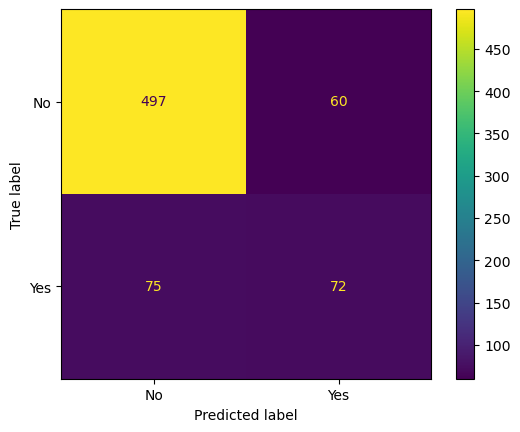

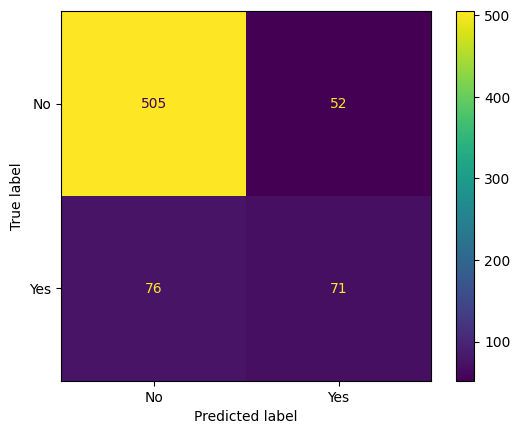

In [820]:
ConfusionMatrixDisplay.from_estimator(grid.best_estimator_, X_test, y_test)

In [821]:
from sklearn.tree import plot_tree

[Text(0.4425633445945946, 0.9705882352941176, 'x[3] <= 198.05\ngini = 0.396\nsamples = 6328\nvalue = [4606.0, 1722.0]'),
 Text(0.12175675675675676, 0.9117647058823529, 'x[14] <= 0.5\ngini = 0.5\nsamples = 1054\nvalue = [532, 522]'),
 Text(0.2821600506756757, 0.9411764705882353, 'True  '),
 Text(0.09648648648648649, 0.8529411764705882, 'x[13] <= 0.5\ngini = 0.448\nsamples = 671\nvalue = [227.0, 444.0]'),
 Text(0.0718918918918919, 0.7941176470588235, 'x[2] <= 64.95\ngini = 0.431\nsamples = 598\nvalue = [188, 410]'),
 Text(0.05081081081081081, 0.7352941176470589, 'x[19] <= 0.5\ngini = 0.495\nsamples = 299\nvalue = [134, 165]'),
 Text(0.036756756756756756, 0.6764705882352942, 'x[26] <= 0.5\ngini = 0.489\nsamples = 262\nvalue = [112, 150]'),
 Text(0.021621621621621623, 0.6176470588235294, 'x[2] <= 45.625\ngini = 0.5\nsamples = 119\nvalue = [59, 60]'),
 Text(0.017297297297297298, 0.5588235294117647, 'x[2] <= 40.25\ngini = 0.491\nsamples = 76\nvalue = [43, 33]'),
 Text(0.008648648648648649, 0

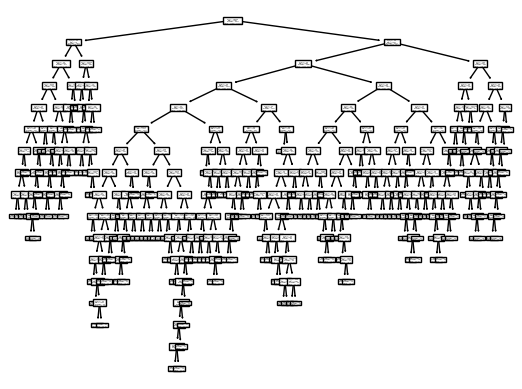

In [822]:
plot_tree(grid.best_estimator_)

<img src='hugetree.png'>

## Случайный лес (Random Forest)

**Задание: Создайте модель случайного леса, затем выведите отчёт "classification report" и матрицу ошибок для предсказанных результатов на тестовом наборе данных.**

In [823]:
# Напишите Ваш код в этой ячейке
from sklearn.ensemble import RandomForestClassifier

In [824]:
from sklearn.metrics import accuracy_score

In [852]:
model_rfc = RandomForestClassifier()

In [858]:
n_estimators = [64, 100, 128, 200]
max_features = [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]

param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'bootstrap': bootstrap,
              'oob_score': oob_score}

In [859]:
grid = GridSearchCV(model_rfc, param_grid=param_grid)

In [860]:
grid.fit(X_train, y_train)

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages

,estimator,RandomForestC...stimators=119)
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [64, 100, ...], 'oob_score': [True, False]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [ ]:
grid.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 200, 'oob_score': False}

In [862]:
y_pred = grid.best_estimator_.predict(X_test)

In [864]:
residuals = []
misclassifications = []
for n in range(205, 400):
    model_rfc = RandomForestClassifier(n_estimators=n, bootstrap=True, max_features=3)
    
    model_rfc.fit(X_train, y_train)
    y_pred = model_rfc.predict(X_test)
    
    residuals.append(1 - accuracy_score(y_test, y_pred))

    n_missed = (y_pred != y_test).sum()
    misclassifications.append(n_missed)

Text(0, 0.5, 'misclassifications')

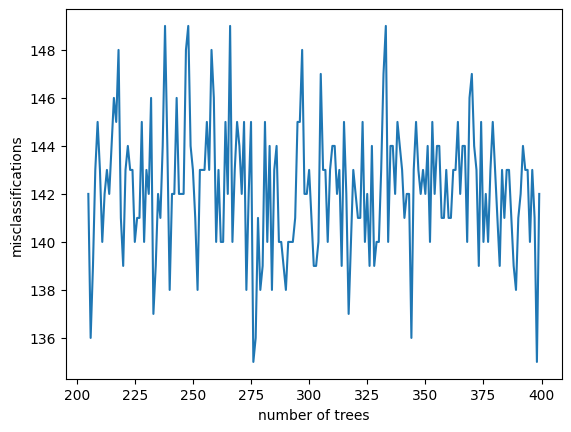

In [865]:
plt.plot(range(205, 400), misclassifications)
plt.xlabel('number of trees')
plt.ylabel('misclassifications')

Text(0, 0.5, 'error {1 - accuracy}')

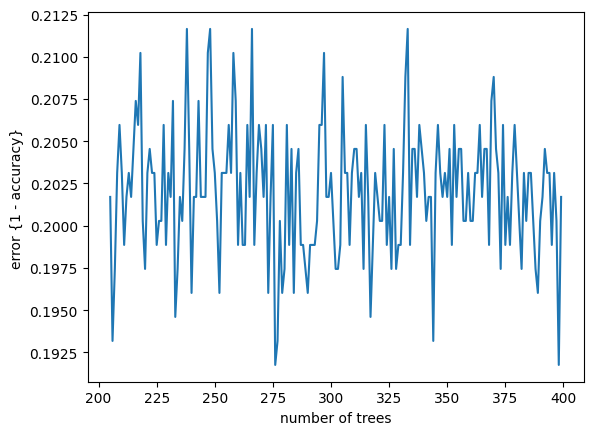

In [866]:
plt.plot(range(205, 400), residuals)
plt.xlabel('number of trees')
plt.ylabel('error {1 - accuracy}')

In [1052]:
model_rfc = RandomForestClassifier(n_estimators=100, max_features=3, max_depth=15)
model_rfc.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,3
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [1053]:
y_pred = model_rfc.predict(X_test)

In [1054]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.90      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



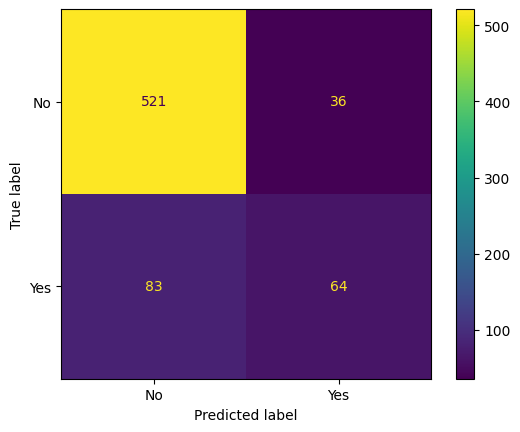

In [1003]:
ConfusionMatrixDisplay.from_estimator(model_rfc, X_test, y_test)

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.50      0.46      0.48       147

    accuracy                           0.79       704
   macro avg       0.68      0.67      0.67       704
weighted avg       0.78      0.79      0.79       704



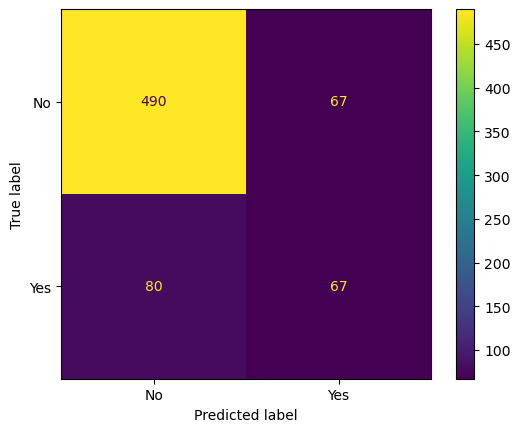

## Расширяемые деревья (Boosted Trees)

**Задание: Создайте модель AdaBoost или Gradient Boosting, затем выведите отчёт "classification report" и матрицу ошибок для предсказанных результатов на тестовом наборе данных.**

In [887]:
# Напишите Ваш код в этой ячейке
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adaboost = AdaBoostClassifier()

In [890]:
error_rate = []

for n in range(1, 100):
    adaboost = AdaBoostClassifier(n_estimators=n)
    adaboost.fit(X_train, y_train)

    y_pred = adaboost.predict(X_test)

    error_rate.append(1 - accuracy_score(y_test, y_pred))

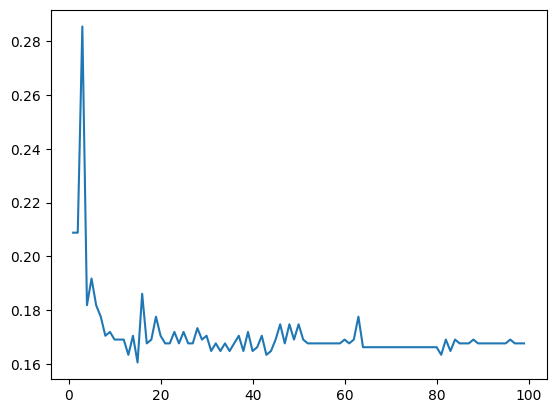

In [892]:
plt.plot(range(1, 100), error_rate)

In [893]:
adaboost = AdaBoostClassifier(n_estimators=55)
adaboost.fit(X_train, y_train)

,estimator,None
,n_estimators,55
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None


In [894]:
y_pred = adaboost.predict(X_test)

In [895]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.92      0.90       557
         Yes       0.62      0.50      0.55       147

    accuracy                           0.83       704
   macro avg       0.75      0.71      0.72       704
weighted avg       0.82      0.83      0.83       704



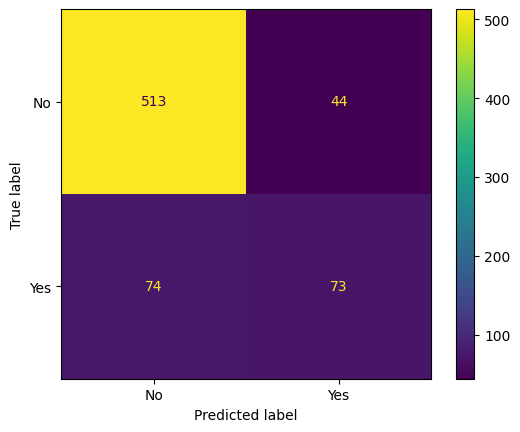

In [896]:
ConfusionMatrixDisplay.from_estimator(adaboost, X_test, y_test)

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



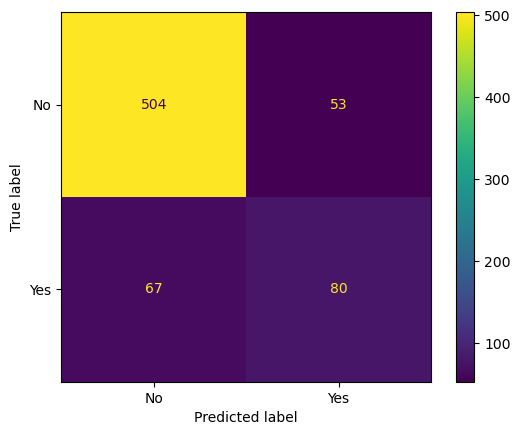

**Задания: Сравнивая результаты, какая модель у Вас работает лучше других?**

In [77]:
# У нас получились наилучшие результаты в модели AdaBoostClassifier, 
# однако надо сказать, что мы не выполняли поиск по сетке grid search,
# и целом модели показывали очень похожие результаты на этих данных.

### Отличная работа!

In [897]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc_model = GradientBoostingClassifier()

In [898]:
error_rate = []
misclassifications = []

for n in range(1, 100):
    gbc_model = GradientBoostingClassifier(n_estimators=n)
    gbc_model.fit(X_train, y_train)
    
    y_pred = gbc_model.predict(X_test)

    error_rate.append(1 - accuracy_score(y_test, y_pred))

    n_missed = (y_test != y_pred).sum()

    misclassifications.append(n_missed)

Text(0, 0.5, 'Error rate {1 - accuracy}')

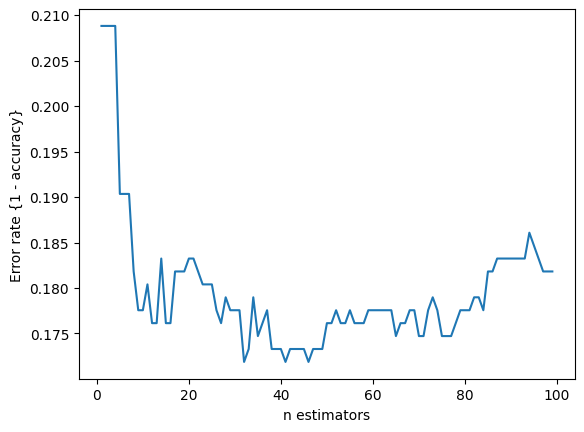

In [900]:
plt.plot(range(1, 100), error_rate)
plt.xlabel('n estimators')
plt.ylabel('Error rate {1 - accuracy}')

Text(0, 0.5, 'misclassifications')

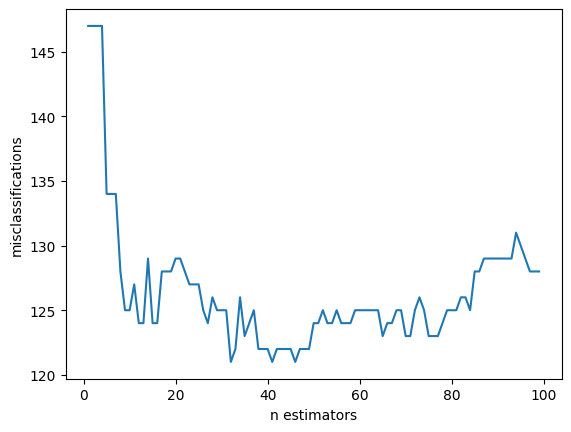

In [901]:
plt.plot(range(1, 100), misclassifications)
plt.xlabel('n estimators')
plt.ylabel('misclassifications')

In [911]:
param_grid = {'n_estimators' : [20, 60, 100], 
              'max_depth': [20, 50, 70],
              'min_samples_split': [5, 10, 15, 20, 30, 35],
              'min_samples_leaf': [5, 15, 20, 25, 30, 40],
              'max_features': ['auto', 'sqrt']}

In [912]:
xgn = GradientBoostingClassifier()

In [913]:
grid = GridSearchCV(xgn, param_grid=param_grid, verbose=2)

In [914]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60; tot

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1620 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "d:\PYTHON DATA SCIENCE\Stepik Course\v

,estimator,GradientBoostingClassifier()
,param_grid,"{'max_depth': [20, 50, ...], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [5, 15, ...], 'min_samples_split': [5, 10, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [916]:
grid.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 20,
 'min_samples_split': 15,
 'n_estimators': 20}

In [915]:
grid.best_estimator_

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,20
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,15
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_depth,20
,min_impurity_decrease,0.0
,init,None


In [917]:
y_pred = grid.best_estimator_.predict(X_test)

In [918]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.92      0.89       557
         Yes       0.59      0.46      0.52       147

    accuracy                           0.82       704
   macro avg       0.73      0.69      0.70       704
weighted avg       0.81      0.82      0.81       704



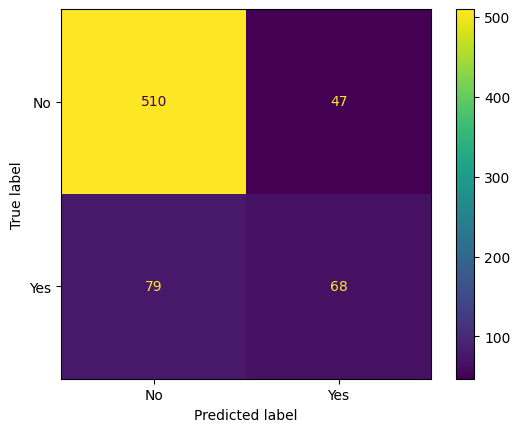

In [920]:
ConfusionMatrixDisplay.from_estimator(grid.best_estimator_, X_test, y_test)

In [924]:
error_rate = []
misclassifications = []

for n in range(2, 100):
    model = GradientBoostingClassifier(max_depth= 20,
                                       max_features='sqrt',
                                       min_samples_leaf=20,
                                       min_samples_split=15,
                                       n_estimators = n)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    error_rate.append(1 - accuracy_score(y_test, y_pred))

    misclassifications.append((y_test != y_pred).sum())



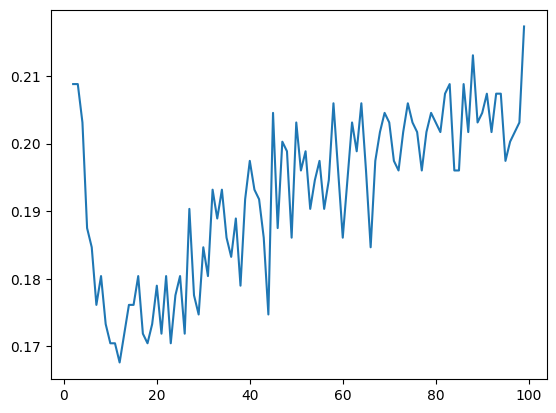

In [925]:
plt.plot(range(2, 100), error_rate)

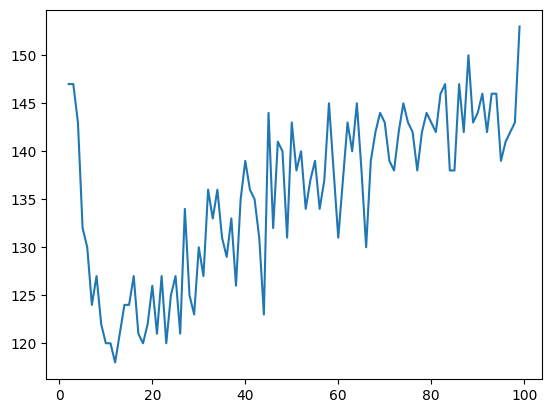

In [926]:
plt.plot(range(2, 100), misclassifications)

In [952]:
model = GradientBoostingClassifier(max_depth= 20,
                                       max_features='sqrt',
                                       min_samples_leaf=20,
                                       min_samples_split=15,
                                       n_estimators=17)
model.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,17
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,15
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_depth,20
,min_impurity_decrease,0.0
,init,None


In [953]:
y_pred = model.predict(X_test)

In [954]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.92      0.89       557
         Yes       0.59      0.44      0.50       147

    accuracy                           0.82       704
   macro avg       0.73      0.68      0.70       704
weighted avg       0.80      0.82      0.81       704



In [963]:
feat_imp = model.feature_importances_
feat_imp

array([0.0103371 , 0.16972934, 0.13963968, 0.14265159, 0.01448076,
       0.00834245, 0.00600602, 0.00313769, 0.00240115, 0.01294196,
       0.07208469, 0.01075065, 0.02155011, 0.02305207, 0.00359821,
       0.01815932, 0.00235145, 0.0090244 , 0.00114149, 0.01899909,
       0.0102096 , 0.00969442, 0.02674877, 0.01129284, 0.02607388,
       0.03294093, 0.0242218 , 0.00423205, 0.07946548, 0.00424344,
       0.00527605, 0.01896194, 0.05625957])

In [964]:
feat_imp = pd.DataFrame(index=X.columns, data=feat_imp, columns=['Importance'])

In [976]:
feat_imp = feat_imp.sort_values(by='Importance')
feat_imp

,Importance
TechSupport_No internet service,0.001141
DeviceProtection_No internet service,0.002351
MultipleLines_No phone service,0.002401
PhoneService_Yes,0.003138
OnlineBackup_No internet service,0.003598
PaymentMethod_Credit card (automatic),0.004232
PaymentMethod_Mailed check,0.004243
Tenure Cohort_12-24,0.005276
Dependents_Yes,0.006006
Partner_Yes,0.008342


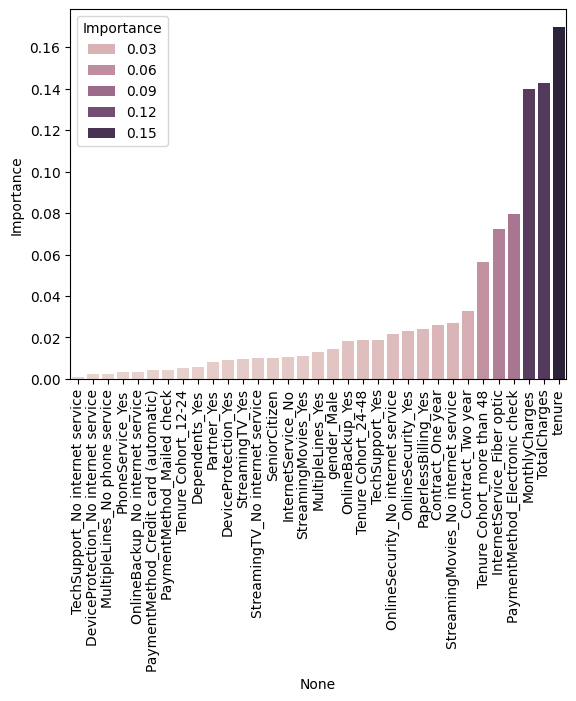

In [984]:
sns.barplot(data=feat_imp, x=feat_imp.index, y='Importance', hue='Importance')
plt.xticks(rotation=90);

In [1055]:
from sklearn.svm import SVC

In [1102]:
error = []
mis = []

for n in [0.01, 0.1, 1, 5, 10]:
    svc = SVC(C=n, kernel='sigmoid', class_weight='balanced')
    svc.fit(X_train, y_train)

    pred = svc.predict(X_test)
    error.append(1 - accuracy_score(y_test, pred))

    mis.append((y_test != pred).sum())

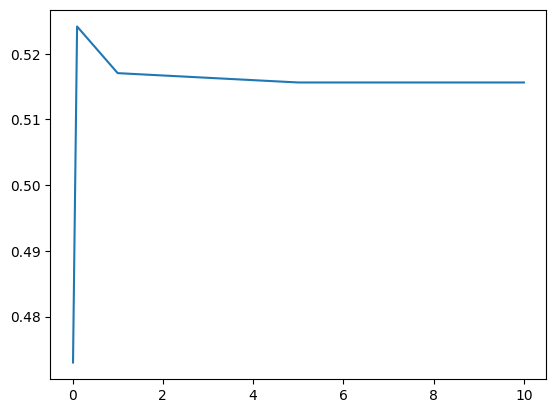

In [1104]:
plt.plot([0.01, 0.1, 1, 5, 10], error)

In [1176]:
svc = SVC(C=1000000, class_weight='balanced', kernel='rbf')
svc.fit(X_train, y_train)

pred = svc.predict(X_test)

In [1177]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          No       0.93      0.72      0.81       557
         Yes       0.43      0.80      0.56       147

    accuracy                           0.74       704
   macro avg       0.68      0.76      0.68       704
weighted avg       0.83      0.74      0.76       704



In [ ]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)